In [ ]:
#libraries
!pip install pydrive
!pip install GoogleCredential
!pip install auth
#!pip install -q time
#!pip install -q glob
!pip install -q keras
!pip install -q IPython
!pip install -q matplotlib
!pip install -q numpy
!pip install -q pandas
!pip install -q plotly
!pip install -q tensorflow
!pip install -q seaborn
!pip install -q scikit-learn
!pip install tqdm
!pip install -q os-sys
!pip install -q librosa
!pip install -q resampy
!pip install -q sounddevice

ERROR: Could not find a version that satisfies the requirement GoogleCredential (from versions: none)
ERROR: No matching distribution found for GoogleCredential
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.2/363.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error

In [ ]:
!apt-get install -y portaudio19-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 2s (106 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [ ]:
!pip install sounddevice


In [ ]:
import os
import random
import sys
import time
import pandas as pd
import numpy as np
np.complex = complex
import librosa
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from tqdm import tqdm
from google.colab import drive
import seaborn as sns
import sounddevice as sd
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
data_df = pd.DataFrame(columns=['path','emotion','intensity','repetition','gender'])
count = 0

actor_folder_path = '/content/drive/MyDrive/Actor_01'
count=0

file_list = os.listdir(actor_folder_path)

for f in file_list:
    nm = f.split('.')[0].split('-')
    path = os.path.join(actor_folder_path, f)
    for i in range(0,len(nm)):
      if i==2:
        if nm[i]=='01':
          emotion='neutral'
        elif nm[i]=='02':
          emotion='calm'
        elif nm[i]=='03':
          emotion='happy'
        elif nm[i]=='04':
          emotion='sad'
        elif nm[i]=='05':
          emotion='angry'
        elif nm[i]=='06':
          emotion='fearful'
        elif nm[i]=='07':
          emotion='disgust'
        elif nm[i]=='08':
          emotion='surprised'
        else : emotion='null'
      if i==3:
        if nm[i]=='01':
          intensity='normal'
        elif nm[i]=='02':
          intensity='strong'
        else : intensity='null'
      if i==5:
        if nm[i]=='01':
          repetition=1
        elif nm[i]=='02':
          repetition=2
        else : repetition=0
      if i==6:
        if int(nm[i])%2==0:
          gender=0
        else: gender=1
    data_df.loc[count] = [path,emotion,intensity,repetition,gender]
    count += 1




data_df.head()


,path,emotion,intensity,repetition,gender
0,/content/drive/MyDrive/Actor_01/03-01-03-02-01...,happy,strong,2,1
1,/content/drive/MyDrive/Actor_01/03-01-04-01-01...,sad,normal,1,1
2,/content/drive/MyDrive/Actor_01/03-01-04-01-01...,sad,normal,2,1
3,/content/drive/MyDrive/Actor_01/03-01-04-02-01...,sad,strong,1,1
4,/content/drive/MyDrive/Actor_01/03-01-05-02-01...,angry,strong,1,1


In [ ]:
data_df.to_csv('data_df.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Samples** in audio processing are the smallest units of a digital audio signal.
* **Sample_rate** it is like a freq or number if sample in the specific window

In [ ]:
#im taking one random file to play
filename=data_df.path[1]
samples,sample_rate=librosa.load(filename)



the Log specgram function here will take sample rate and sample rate ok ,sample rate the the frequency we are using for this analysis which is 22500Hz which is default ok

*   nperseg : number of sampels is each window
*   novelap: is the number of overlapping windows

spectrogram Calculation here :

we are find the spectrogram using STFT
short time forrier transform
*   window='hann': hanning window is used to reduce the sprectral leakage
*    detrend: used to  Avoid removal of  trend.
*   trend here is A trend refers to a general direction in which something is developing, changing

Finally the function here  will return
* Array of frequency bins
* araray of Time segments corresponding to start.
* spec which is logscale like 2D matrix



In [ ]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

librosa will the display the audio file .
Basic Matplolib is used to display the graph in grids.

spec is the spectrogram, typically a 2D array where:
* Rows: Represent different frequency bins.
* Columns: Represent different time frames.
* Values: Represent the magnitude or power of each frequency at each time frame.
.T (Transpose)
* spec.T transposes the spectrogram:
* Before Transpose: spec[frequency, time]
* After Transpose: spec.T[time, frequency]
* .astype(np.float32) : is used to convert the matrix to the float ,to avoid problems

Text(0.5, 0, 'Seconds')

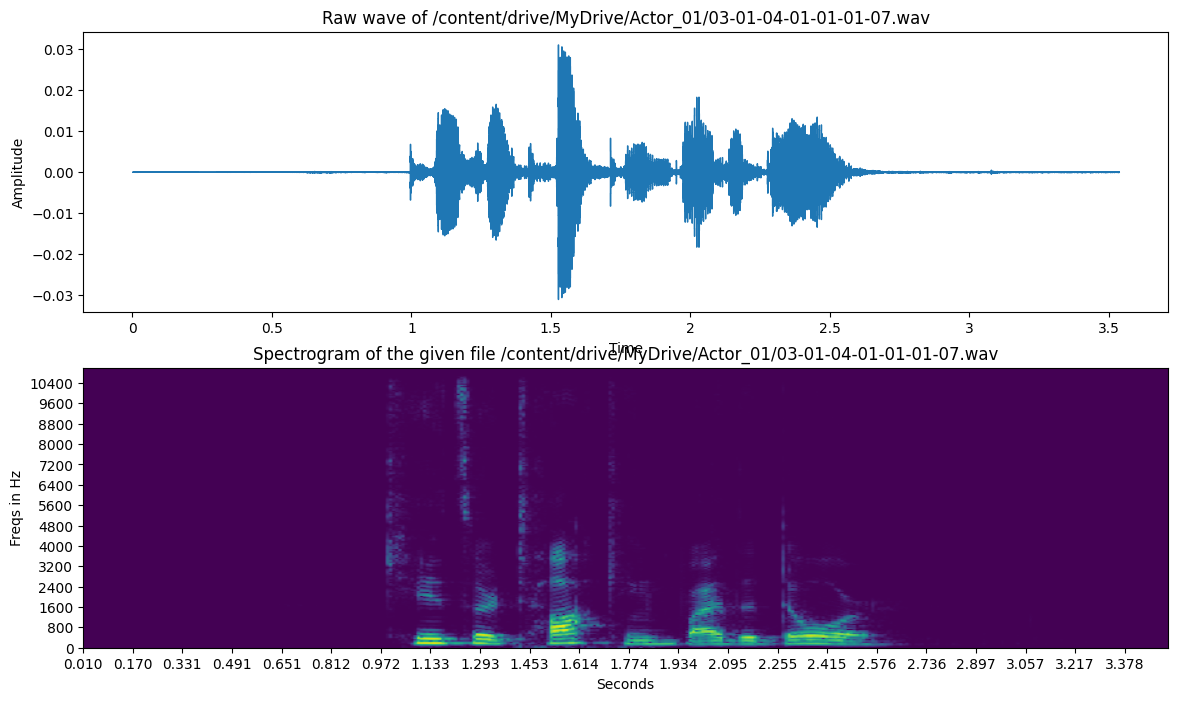

In [ ]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

#first cell of the grid
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

#second cell of the grid
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of the given file ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

* mean: the below code is ot find the  1D numpy array of the magnitude of mean in of the corresponding frequency
* std: is finding the deviation form the mean position .

* Standardization
z= (x−μ)/σ

why standardization ?
*  Many ML models (e.g., neural networks, SVMs) work better when features have a mean of 0 and a standard deviation of 1.
*  Standardization ensures all frequency components are on a comparable scale, preventing any single frequency from dominating due to larger magnitude values.

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

Trimming the silent part in the numpy array
* top_dB is the threshold value it means any value of amplitude less then the threshold will be considered silent!.
* aa: The trimmed audio signal (after removing leading and trailing silence).
This is the actual waveform data (a 1D array) of the audio without the silence parts.
* bb: The index positions of the trimmed segment in the original audio (samples).

In [ ]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([ 2.0676640e-05, -5.4564543e-06,  2.9525786e-06, ...,
        -1.8187854e-04, -2.5894624e-04, -3.2386975e-04], dtype=float32),
 array([20992, 58368]))

In [ ]:
print(f" The frequency we are using here is {sample_rate}Hz")

 The frequency we are using here is 22050Hz


**MFCC(Mel-Frequency Cepstral Coefficients)**
* calculating the mfcc using librosa
* it is actually a compressed view.
* y=aa: alrady timmed audio signal.
* sr=sample_rate: freq
* n_mels=128: The number of Mel bands to use. The Mel scale is a perceptual scale of pitches, and this parameter specifies how many bands the spectrogram will have.changeble
* The power spectrogram is the squared magnitude of the Short-Time Fourier Transform (STFT) of the audio signal:
S=|STFI|^2


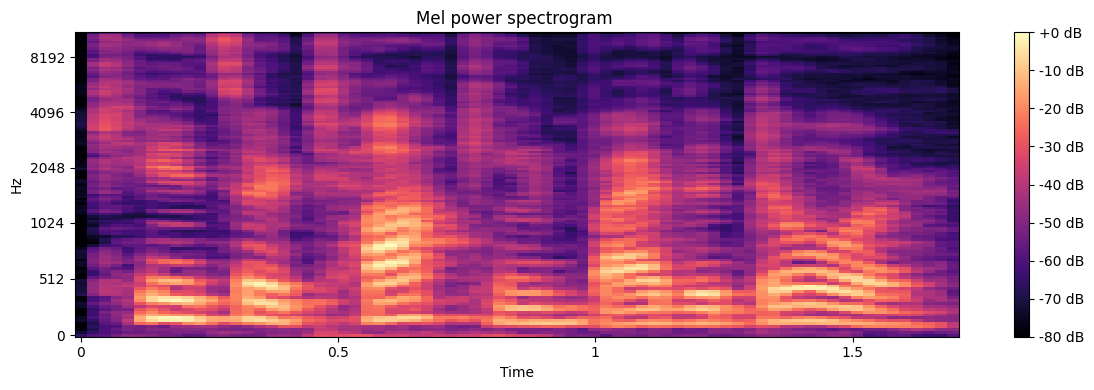

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(y=aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

**MEL Power Spectrum**
* Represents the power of the signal in various frequency bands, transformed to the Mel scale.
* It is essentially a time-frequency representation of the audio where the amplitude is in decibels (dB).
* The log_S is the logarithmic scale of the Mel spectrogram, showing how much power is present in different Mel-frequency bands across time.

we are using Delta 2 which is like acceleration in MFCC.(order =2)



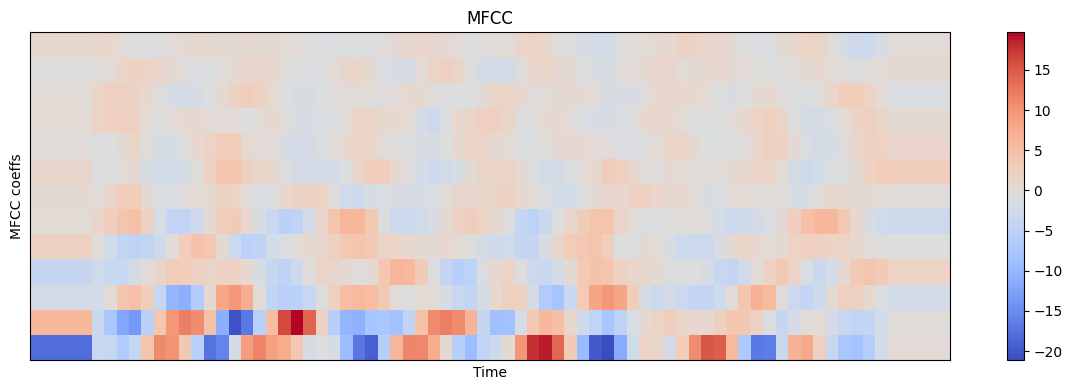

In [ ]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
audio_data2, sample_rate2 = librosa.load(filename, sr=None)
Audio(audio_data2, rate=sample_rate2)

In [ ]:
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [ ]:
!pip install -U resampy

In [ ]:
def undersample_to_min_class(data, label_column):
    min_count = data[label_column].value_counts().min()
    undersampled_data = data.groupby(label_column).apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    return undersampled_data


data_df = undersample_to_min_class(data_df, label_column="emotion")

<ipython-input-29-4e2f0fc726a7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_data = data.groupby(label_column).apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [ ]:
print(data_df["emotion"].value_counts())

emotion
angry        91
calm         91
disgust      91
fearful      91
happy        91
neutral      91
sad          91
surprised    91
Name: count, dtype: int64


* input duration indicates duration of the input audio file
* creating a new data Frame to store MFCC features
* loading a all the files and extracting the features
* we are using 44K hz for better accuracy
* we are ignoring 0.5s of the begining file .
* we are using Resampling algorithm 'keiser_fast'used to change the freq form 22k-44kHz.
* n_mfcc=13: Specifies that 13 MFCC features should be extracted. These features capture the timbral texture of the audio

In [ ]:
input_duration=3
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

data_df.head()

100%|██████████| 728/728 [00:58<00:00, 12.46it/s]


,path,emotion,intensity,repetition,gender
0,/content/drive/MyDrive/Actor_01/03-01-05-02-02...,angry,strong,2,0
1,/content/drive/MyDrive/Actor_01/03-01-05-01-02...,angry,normal,1,1
2,/content/drive/MyDrive/Actor_01/03-01-05-01-02...,angry,normal,1,0
3,/content/drive/MyDrive/Actor_01/03-01-05-02-01...,angry,strong,2,0
4,/content/drive/MyDrive/Actor_01/03-01-05-01-01...,angry,normal,1,0


below code is to print the bar plot of th te emotion distribution.

In [ ]:
def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count.
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

<ipython-input-32-19a865099180>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


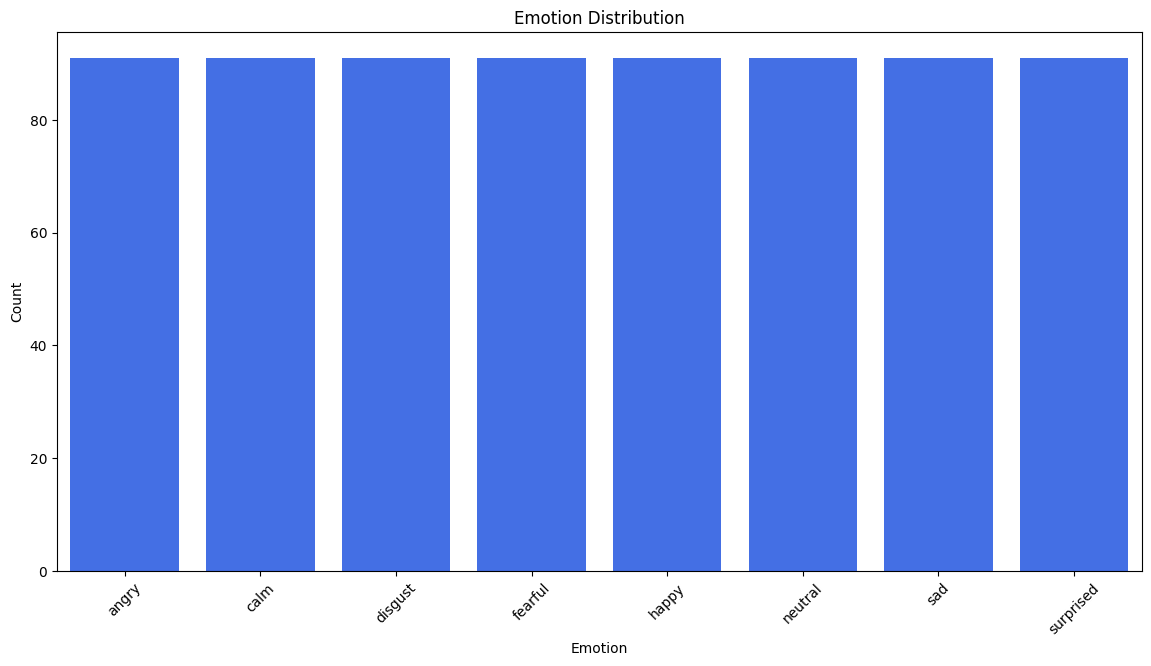

In [ ]:
a = data_df.emotion.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [ ]:
neutral_data = pd.concat([
    data_df[data_df["emotion"] == "calm"],
    data_df[data_df["emotion"] == "neutral"]
])

# Combine all positive emotions
positive_data = pd.concat([
    data_df[data_df["emotion"] == "happy"],
    data_df[data_df["emotion"] == "surprised"]
])

# Combine all negative emotions
negative_data = pd.concat([
    data_df[data_df["emotion"] == "sad"],
    data_df[data_df["emotion"] == "disgust"],
    data_df[data_df["emotion"] == "fearful"],
    data_df[data_df["emotion"] == "angry"]
])
positive_data.head()


,path,emotion,intensity,repetition,gender
364,/content/drive/MyDrive/Actor_01/03-01-03-01-01...,happy,normal,1,1
365,/content/drive/MyDrive/Actor_01/03-01-03-02-01...,happy,strong,1,1
366,/content/drive/MyDrive/Actor_01/03-01-03-02-01...,happy,strong,1,0
367,/content/drive/MyDrive/Actor_01/03-01-03-02-02...,happy,strong,2,1
368,/content/drive/MyDrive/Actor_01/03-01-03-02-01...,happy,strong,2,0


In [ ]:
len(negative_data)

364

stress segregation

In [ ]:
data_df=pd.concat([neutral_data,positive_data,negative_data], axis=0)

In [ ]:
data_df.head()
data_df.to_csv('data_df_test.csv', index=False)

In [ ]:
all_values = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
data_df.emotion.value_counts().reindex(all_values, fill_value=0)


,count
emotion,
neutral,91
calm,91
happy,91
sad,91
angry,91
fearful,91
disgust,91
surprised,91


<ipython-input-32-19a865099180>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


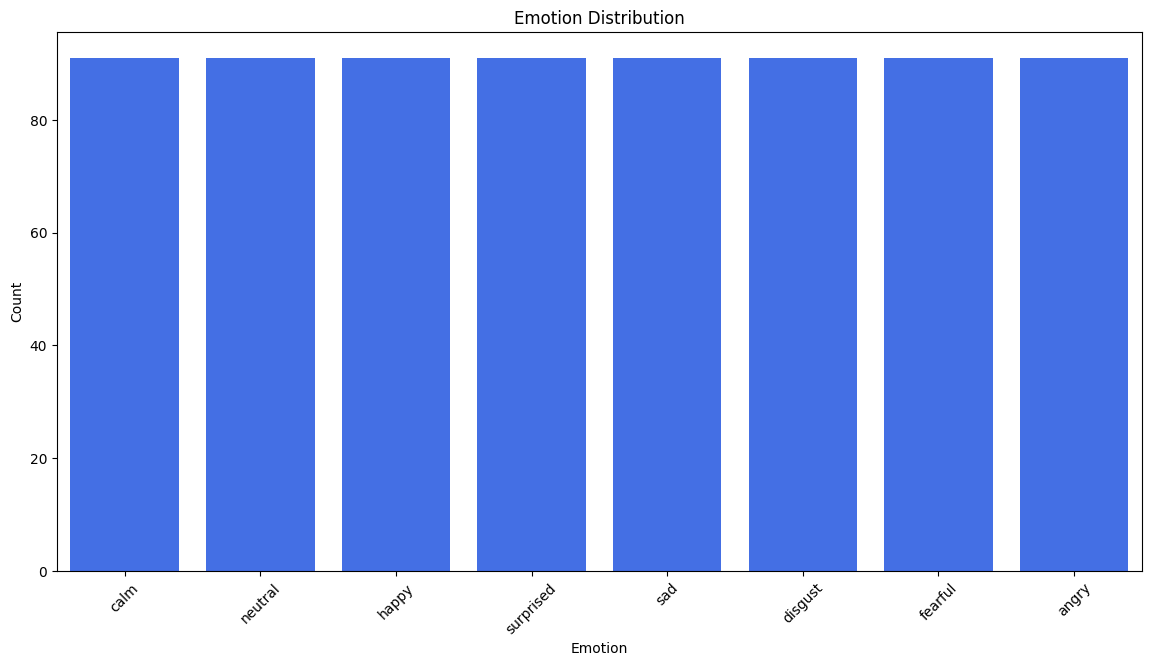

In [ ]:
a = data_df.emotion.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [ ]:
data_df=data_df.reset_index(drop=True)

In [ ]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 728/728 [00:58<00:00, 12.44it/s]


In [ ]:
data.head()

,feature
0,"[-64.52863, -64.52863, -64.52863, -64.52863, -..."
1,"[-61.713028, -60.084797, -61.100246, -61.26429..."
2,"[-60.447815, -59.109768, -60.99139, -65.15611,..."
3,"[-62.0964, -61.286297, -61.35239, -59.57259, -..."
4,"[-54.018562, -51.172974, -50.57775, -49.825703..."


In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.emotion

In [ ]:
df3.head()


,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-58.356590,-59.465065,-61.582771,-58.812534,-58.049385,-57.363369,-58.892151,-58.347542,-57.404564,-59.414219
1,-61.713028,-60.084797,-61.100246,-61.264297,-63.234470,-64.450409,-64.190727,-61.222500,-57.964943,-56.499577,...,-26.181793,-25.678749,-24.625862,-25.441837,-25.092628,-24.719156,-24.744169,-25.344248,-26.541983,-26.607536
2,-60.447815,-59.109768,-60.991390,-65.156113,-61.927040,-60.033447,-62.115398,-68.920403,-73.610298,-72.389114,...,-38.555824,-35.908482,-36.434246,-38.449429,-38.690456,-40.447731,-37.214275,-31.459759,-31.030851,-30.625746
3,-62.096401,-61.286297,-61.352390,-59.572590,-59.312859,-59.352558,-62.197388,-61.885601,-59.452030,-61.568802,...,-61.437195,-58.136292,-54.362076,-54.811497,-55.451744,-52.149498,-50.306519,-52.526604,-49.780552,-45.484932
4,-54.018562,-51.172974,-50.577751,-49.825703,-50.883427,-49.652412,-49.599895,-53.588726,-54.398430,-52.963585,...,-52.024315,-51.788368,-53.136726,-52.487568,-49.561394,-48.434761,-49.950188,-49.119774,-50.478958,-48.991371


In [ ]:
df3.to_csv('df3.csv', index=False)
labels.to_csv('labels.csv', index=False)

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

728

In [ ]:
rnewdf.isnull().sum().sum()

3122

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,emotion
0,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-59.465065,-61.582771,-58.812534,-58.049385,-57.363369,-58.892151,-58.347542,-57.404564,-59.414219,calm
1,-61.713028,-60.084797,-61.100246,-61.264297,-63.234470,-64.450409,-64.190727,-61.222500,-57.964943,-56.499577,...,-25.678749,-24.625862,-25.441837,-25.092628,-24.719156,-24.744169,-25.344248,-26.541983,-26.607536,calm
2,-60.447815,-59.109768,-60.991390,-65.156113,-61.927040,-60.033447,-62.115398,-68.920403,-73.610298,-72.389114,...,-35.908482,-36.434246,-38.449429,-38.690456,-40.447731,-37.214275,-31.459759,-31.030851,-30.625746,calm
3,-62.096401,-61.286297,-61.352390,-59.572590,-59.312859,-59.352558,-62.197388,-61.885601,-59.452030,-61.568802,...,-58.136292,-54.362076,-54.811497,-55.451744,-52.149498,-50.306519,-52.526604,-49.780552,-45.484932,calm
4,-54.018562,-51.172974,-50.577751,-49.825703,-50.883427,-49.652412,-49.599895,-53.588726,-54.398430,-52.963585,...,-51.788368,-53.136726,-52.487568,-49.561394,-48.434761,-49.950188,-49.119774,-50.478958,-48.991371,calm


**Noise**
* To add white noise to the audio signal as a data augmentation  technique

Shift(data)
* to make the model unbiased towards specific patterns

Pitch(data,sample_rate)
* The pitch of an audio signal is a perceptual property that allows us to determine how "high" or "low" a sound is. It is closely related to the frequency of the sound wav
* To shift the pitch of the audio signal up or down.
* make the model robust

Dyn_change
* To apply a random scaling factor to change the dynamic range (volume) of the audio.

SpeedNpitch
* To Simulataniously change the speed of the audio signal



In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)

def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """

    bins_per_octave = 12
    pitch_pm=2
    pitch_change =  pitch_pm * 2*(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      sr=sample_rate, n_steps=pitch_change,
                                      bins_per_octave=bins_per_octave)
    return data

def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)

def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data


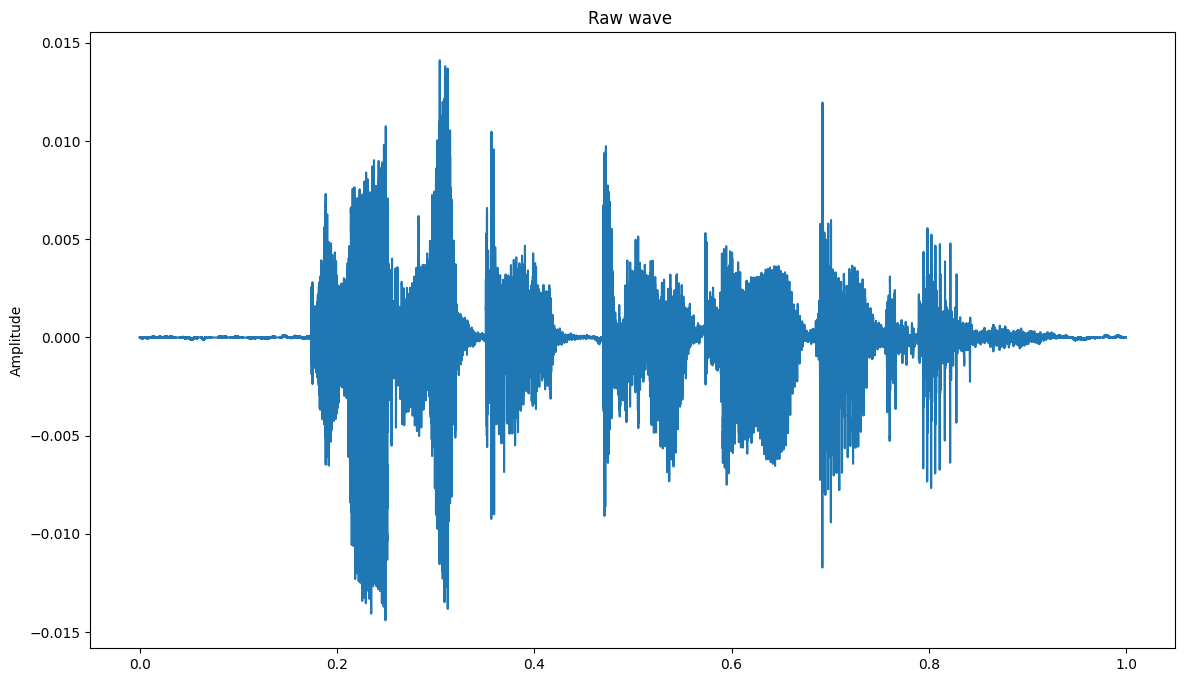

In [ ]:
X, sample_rate = librosa.load(data_df.path[2], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.3)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

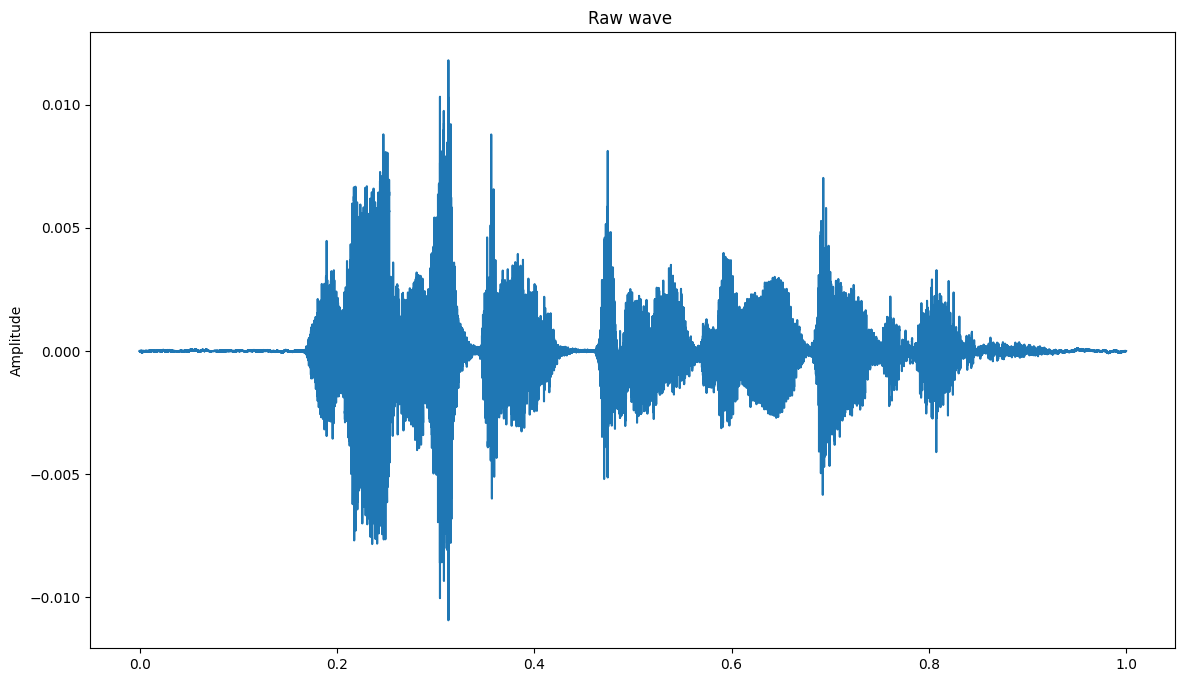

In [ ]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

Data Synthesis
* loading file and creating a new data frame with mfcc+ emotion label as data fields


In [ ]:
syn_data1 = pd.DataFrame(columns=['feature', 'emotion'])

for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.emotion[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data_df.emotion[i]]

100%|██████████| 728/728 [01:03<00:00, 11.40it/s]


In [ ]:
# Data Making Method 2

syn_data2 = pd.DataFrame(columns=['feature', 'emotion'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.emotion[i]:
#     if data2_df.label[i] == "male_positive":
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data_df.emotion[i]]


100%|██████████| 728/728 [02:02<00:00,  5.95it/s]


In [ ]:
syn_data2.feature
syn_data2.to_csv('syn_data2.csv', index=False)

In [ ]:
len(syn_data1), len(syn_data2)
syn_data1.to_csv('syndata_one.csv', index=False)

In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

D4 data frame here is using dataframe with  eachh sublist has row and each element in that sublist as column as matrix
* labels4 store the emotion data of the syndata1
* syndf1 :  Combines the features (df4) and their corresponding emotion labels (labels4) into a single DataFrame (syndf1)
* syndf1 .fillna(0) used to fill nan with 0
*

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.emotion
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "emotion"})
syndf1 = syndf1.fillna(0)
len(syndf1)

728

In [ ]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.emotion
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "emotion"})
syndf2 = syndf2.fillna(0)
len(syndf2)

728

In [ ]:
syndf2.head()
syndf2.to_csv('syndf2.csv', index=False)

In [ ]:
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,emotion
0,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-59.465065,-61.582771,-58.812534,-58.049385,-57.363369,-58.892151,-58.347542,-57.404564,-59.414219,calm
1,-61.713028,-60.084797,-61.100246,-61.264297,-63.234470,-64.450409,-64.190727,-61.222500,-57.964943,-56.499577,...,-25.678749,-24.625862,-25.441837,-25.092628,-24.719156,-24.744169,-25.344248,-26.541983,-26.607536,calm
2,-60.447815,-59.109768,-60.991390,-65.156113,-61.927040,-60.033447,-62.115398,-68.920403,-73.610298,-72.389114,...,-35.908482,-36.434246,-38.449429,-38.690456,-40.447731,-37.214275,-31.459759,-31.030851,-30.625746,calm
3,-62.096401,-61.286297,-61.352390,-59.572590,-59.312859,-59.352558,-62.197388,-61.885601,-59.452030,-61.568802,...,-58.136292,-54.362076,-54.811497,-55.451744,-52.149498,-50.306519,-52.526604,-49.780552,-45.484932,calm
4,-54.018562,-51.172974,-50.577751,-49.825703,-50.883427,-49.652412,-49.599895,-53.588726,-54.398430,-52.963585,...,-51.788368,-53.136726,-52.487568,-49.561394,-48.434761,-49.950188,-49.119774,-50.478958,-48.991371,calm


In [ ]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,emotion
0,-59.811453,-59.498302,-58.471882,-56.825528,-56.780970,-57.939945,-57.006360,-55.223518,-56.866173,-58.409853,...,-54.682863,-53.902383,-53.992205,-54.499586,-53.033958,-53.145766,-55.168138,-56.390882,-58.026874,calm
1,-52.134811,-49.064597,-49.505269,-53.607340,-53.109469,-51.764494,-52.603368,-50.526064,-49.908302,-49.448895,...,-24.747371,-24.049673,-24.708359,-24.723494,-24.750852,-24.463048,-24.675706,-26.033475,-26.111504,calm
2,-57.956808,-54.932394,-55.653814,-60.453919,-57.684395,-57.822510,-59.364871,-64.154205,-64.755191,-63.687162,...,-34.822902,-35.217260,-37.184164,-37.759060,-39.709075,-36.627129,-30.897729,-30.446172,-30.458806,calm
3,-60.945807,-59.118384,-58.729317,-56.572362,-54.922365,-57.252150,-60.532276,-59.408142,-56.708412,-57.437009,...,-55.408889,-52.485389,-52.261669,-53.545486,-50.463132,-48.734431,-50.119272,-47.770737,-44.479368,calm
4,-53.832836,-50.859335,-50.182449,-49.803279,-50.834666,-49.739423,-50.212492,-53.726311,-54.228265,-53.000051,...,-51.598120,-52.823393,-52.411573,-49.501677,-48.364250,-50.173944,-49.272353,-50.555001,-49.184957,calm


In [ ]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,emotion
0,-68.356859,-68.356859,-68.356859,-68.356859,-68.356859,-68.356859,-68.356859,-68.356859,-68.356859,-68.959576,...,-63.924167,-64.283054,-62.039738,-62.294968,-63.106429,-63.796559,-63.529186,-62.425721,-63.766104,calm
1,-61.908722,-60.684249,-61.825831,-62.844487,-63.513245,-64.802677,-64.503651,-61.738618,-59.581678,-58.333509,...,-28.001935,-28.357934,-28.743633,-27.856489,-27.334968,-29.674045,-28.470516,-28.191004,-31.399645,calm
2,-60.427768,-59.266164,-62.378078,-65.354783,-63.279418,-62.957665,-64.394784,-68.751033,-74.682922,-72.020443,...,-39.589213,-39.314826,-39.526418,-40.616751,-42.031593,-39.983960,-35.806188,-34.877277,-36.270543,calm
3,-62.489355,-61.662950,-61.679608,-62.004600,-62.061275,-64.205820,-64.889436,-65.711683,-65.311757,-66.787131,...,-60.805396,-61.402786,-58.941874,-57.456899,-54.895761,-53.209136,-53.095012,-51.320149,-51.354852,calm
4,-53.327741,-50.702219,-51.052392,-51.062446,-51.288783,-50.928227,-53.636093,-55.583398,-54.942523,-54.138352,...,-53.556780,-54.170632,-53.152905,-50.588004,-49.566711,-51.414274,-52.277885,-52.886387,-54.763570,calm


In past operations we have extracted and added additional data features such as shift noise and many more this code is to sombine and all data frames into one to get higher precision in model.

In [ ]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()
combined_df.to_csv('combined_df.csv', index=False)

**Stratification**

here we are splitting  the data into training and stesting and while also maintaining  the proportion of the output classes same .
* so here we are using 1:4 or 20 % of data is used to predict and 80% of the data i used to train the model.

In [ ]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['emotion'], axis=1)  #mfcc features
y = combined_df.emotion # emotion features
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)  #initializing
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

,count
emotion,
happy,219
sad,219
angry,219
fearful,218
neutral,218
disgust,218
calm,218
surprised,218


In [ ]:
y_test.value_counts()

,count
emotion,
neutral,55
surprised,55
calm,55
fearful,55
disgust,55
angry,54
happy,54
sad,54


* Label encoder :here label encoder is used to convert categorical labels into numerical values.
* to categorical : here is used to convert the numerical labels into one-hot encoded vectors(e.g., [1, 0, 0] for 0, [0, 1, 0] for 1).

* to train Keras Model  we are converting x_train x_test and others to numpy array .
* fittransform her is used to fit number -> transform them to numerical value
* CNN models often require labels to be in one-hot encoded form for classification tasks, as it represents the classes as binary vectors.
* The most important here is the encoder we are saving using pickel as "lab.sav" which help us to avoid mismatch at the predction  part .
*

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

import pickle
pickle.dump(lb, open("lb.sav", 'wb'))

we adding extra dimensions here ,this help 1D CNN to make prediction as these model use specific method for analysing the data.
* X_train and X_test hera rea 2d array with shape (samples ,features) where samples is number of dta points.
* axis =2  will add new dimension transforming it form (samples,features)-> (samples,features,1)
*

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
y_train

In [ ]:
X.to_csv('X.csv', index=False)

y.to_csv('Y.csv', index=False)


Keral Util Functions
* precision : Calculates precision, which measures how many of the predicted positives are actually true positives.
* Precision= True Positives/ Predicted Positives

*Recall :Calculates recall, which measures how many actual positives were correctly identified.
* recall =truePositive/Actual Positive
* F1-Score = which is the harmonic mean of precision and recall.
* F1-Score=2*(precision x recall)/(precision+recall)
* learning-rate= Tracks the current learning rate during training.





In [ ]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
X_train.shape

(1747, 259)

**First Convolutional Layer**
* First Convolutional Layer with 256  filters with size 8.
* No padding is is added .output size< input
* Activation function is Relu to perform non linearity.

**Second Convolutional Layer**
* same as 1st layer with 256 filters and 8 kernal size.
* Batch Normalization
normalize the activation with each to have mean of 0 and a standard deviation as 1.
* Dropout prevents overfitting.

**First Pooling Layer**
* Downsamples the input by taking the maximum value over every window of size 8.

**Third Convolutional Block**
* Similar , but now the number of filters is reduced to 128, reducing computational cost.

**Second Pooling Layer**
* Downsamples the feature maps again, making the model more efficient.

**Fourth Convolutional Block**
* Further reduces the number of filters to 64, focusing on a more compact set of features.
* 'Relu' will apply non linearity

**Flatten Layer**
* 1D feature maps -> 1D vector

**Fully Connnected Layer**
* Dence indicates there are 8 Nurons with each corresponding to target class.
* activation solftmax converts raw scores into probability of each class .



In [ ]:
# New model
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, BatchNormalization, Activation

model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(8))
model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 252, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 252, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 252, 256)            │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 252, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 252, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 31, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 31, 128)             │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 31, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 31, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 31, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 31, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 3, 64)               │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,284,232 (4.90 MB)

 Trainable params: 1,283,464 (4.90 MB)

 Non-trainable params: 768 (3.00 KB)

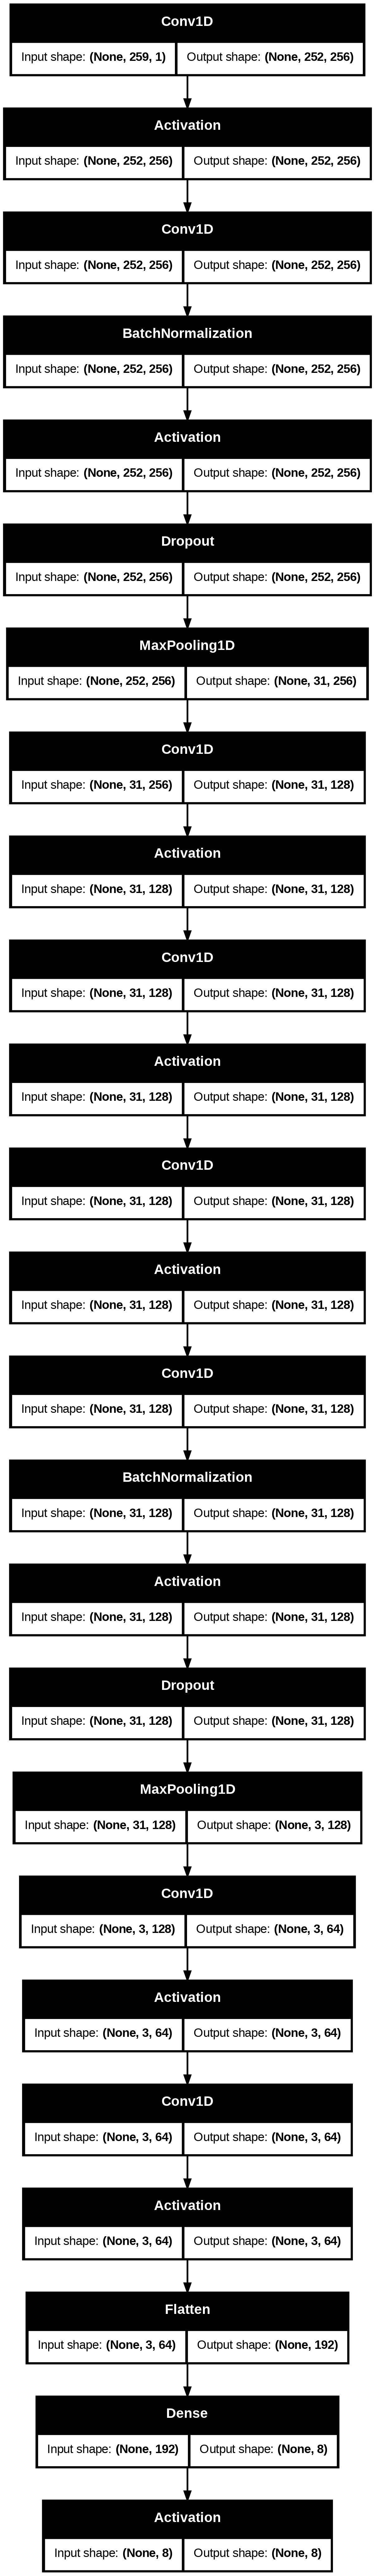

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='demo.png',show_shapes=True)

In [ ]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#x_traincnn
#y_train
#x_testcnn
#y_test

learning plateau
* this adjust the learning rate avoiding overfitting
* learning rate is 0.9
* epoch patience is 20 like it will skip 20 epoch if training not nessasary.
*

In [ ]:
# Model Training
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)

mcp_save = ModelCheckpoint('voicd-data-cnn.keras', save_best_only=True, monitor='val_loss', mode='min')

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.2204 - loss: 1.9679 - val_accuracy: 0.1487 - val_loss: 2.4049 - learning_rate: 0.0010
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2770 - loss: 1.8650 - val_accuracy: 0.2082 - val_loss: 1.9858 - learning_rate: 0.0010
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3208 - loss: 1.7632 - val_accuracy: 0.1236 - val_loss: 2.9561 - learning_rate: 0.0010
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3110 - loss: 1.7744 - val_accuracy: 0.1281 - val_loss: 2.6040 - learning_rate: 0.0010
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3117 - loss: 1.7230 - val_accuracy: 0.2815 - val_loss: 1.8775 - learning_rate: 0.0010
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3583 - loss: 1.6703 - val_accuracy: 0.1556 - val_loss: 3.6272 - learning_rate: 0.0010
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3592 - loss:

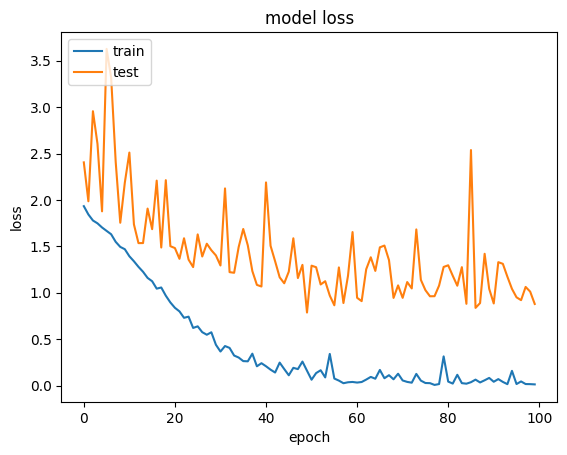

In [ ]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import json
model_json = model.to_json()
with open("voice_model.json", "w") as json_file:
    json_file.write(model_json)

    json_file.write(model_json)

In [ ]:
start_time = time.perf_counter()
y_pred=model.predict(x_testcnn)
pred_category=np.array([])
for i in range(y_pred.shape[0]):
    pred_category=np.append(pred_category, [y_pred[i].argmax(axis=0)])
flat_category = pred_category.astype(int).flatten()
end_time=time.perf_counter()
execution_time = end_time - start_time
print(f"Total execution time is: {execution_time}, per record execution time: {execution_time/y_pred.shape[0]}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
Total execution time is: 2.59686028599981, per record execution time: 0.005942472050342815


In [ ]:
y_test_category=np.array([])
for i in range(y_test.shape[0]):
    y_test_category=np.append(y_test_category, [y_test[i].argmax(axis=0)])
y_test_flat_category = y_test_category.astype(int).flatten()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_flat_category, flat_category, target_names=lb.inverse_transform([0,1,2,3,4,5,6,7])))

              precision    recall  f1-score   support

       angry       0.78      0.78      0.78        54
        calm       0.81      0.71      0.76        55
     disgust       0.83      0.69      0.75        55
     fearful       0.79      0.84      0.81        55
       happy       0.73      0.80      0.76        54
     neutral       0.69      0.73      0.71        55
         sad       0.77      0.74      0.75        54
   surprised       0.79      0.89      0.84        55

    accuracy                           0.77       437
   macro avg       0.77      0.77      0.77       437
weighted avg       0.77      0.77      0.77       437



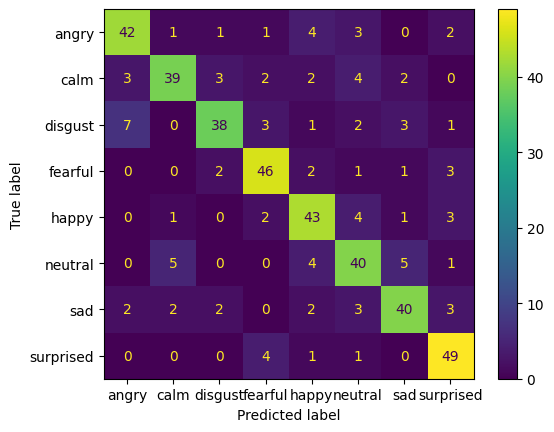

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2,3,4,5,6,7]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2,3,4,5,6,7]))

cm_display.plot()
plt.show()

In [ ]:
model.save('ABD.keras')